### **Step 1: Load and Split the Data Using `ImageDataGenerator`**  

We’ll use `ImageDataGenerator` to split the cat and dog dataset into training and validation sets.

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import numpy as np
import random

# Set random seeds for reproducibility
SEED = 42
tf.random.set_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

In [3]:
# Initialize ImageDataGenerator for splitting and rescaling
data_gen = ImageDataGenerator(
    rescale=1.0/255,  # Normalize pixel values
    validation_split=0.2  # Reserve 20% for validation
)

In [4]:
# Training data generator
train_generator = data_gen.flow_from_directory(
    '../animals/',  # Path to training data
    target_size=(150, 150),  # Resize images to (150x150)
    batch_size=32,  # Number of images per batch
    class_mode='binary',  # Binary classification (cat vs. dog)
    subset='training'  # Use the training portion
)

Found 800 images belonging to 2 classes.


In [5]:
# Ensure validation generator does not shuffle data
validation_generator = data_gen.flow_from_directory(
    '../animals/',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    shuffle=False  # Ensure no shuffling
)

Found 200 images belonging to 2 classes.


1. **Data Rescaling:**  
   - `rescale=1.0/255` normalizes pixel values to `[0, 1]`.

2. **Data Splitting:**  
   - `validation_split=0.2`: Reserves 20% of the training dataset for validation.

3. **Training and Validation Generators:**  
   - `train_generator`: Loads and processes the training portion.  
   - `validation_generator`: Loads and processes the validation portion.  

4. **Parameters:**  
   - `target_size=(150, 150)`: Resizes images to fit the model input.  
   - `batch_size=32`: Specifies the number of images processed per batch.  
   - `class_mode='binary'`: Specifies binary classification for cats and dogs.

---

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

In [8]:
# Initialize the CNN model
model = Sequential([
    # Input Layer
    Input(shape=(150, 150, 3)),

    # Convolutional and Pooling Layers
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Flatten and Fully Connected Layers
    Flatten(),
    Dense(512, activation='relu'),

    # Output Layer
    Dense(1, activation='sigmoid')
])

# Print Model Summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

1. **Model Initialization:**  
   - We create a CNN using `Sequential` and define layers in a list.  

2. **Convolutional Layers:**  
   - `Conv2D(filters, kernel_size, activation)` extracts features.  
   - `MaxPooling2D(pool_size)` reduces spatial dimensions.  

3. **Fully Connected Layer:**  
   - `Dense(units, activation)` processes features before output.  

4. **Output Layer:**  
   - `Dense(1, activation='sigmoid')` outputs a probability for binary classification.  

In [9]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

---

In [11]:
# Train the model
history = model.fit(
    train_generator,
    epochs=10,  
    validation_data=validation_generator
)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 287ms/step - accuracy: 0.5139 - loss: 1.9885 - val_accuracy: 0.6700 - val_loss: 0.6426
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 227ms/step - accuracy: 0.7590 - loss: 0.5427 - val_accuracy: 0.8350 - val_loss: 0.3719
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 228ms/step - accuracy: 0.8790 - loss: 0.3180 - val_accuracy: 0.8550 - val_loss: 0.3371
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 229ms/step - accuracy: 0.9089 - loss: 0.2503 - val_accuracy: 0.9100 - val_loss: 0.2625
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 229ms/step - accuracy: 0.9462 - loss: 0.1607 - val_accuracy: 0.9000 - val_loss: 0.2145
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 226ms/step - accuracy: 0.9578 - loss: 0.1294 - val_accuracy: 0.9450 - val_loss: 0.1666
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 232ms/step - accuracy: 0.9888 - loss: 0.0468 - val_accuracy: 0.9400 - val_loss: 0.1113
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 233ms/step - accuracy: 0.9947 - loss: 0.0199 - val_accuracy: 0.

---

The next step is **Model Evaluation and Visualization.**  

We will:  
1. Evaluate the model’s performance on the validation set.  
2. Visualize training and validation accuracy/loss over epochs.  
3. Display some predictions on test images.  

---

### **Step 1: Evaluate the Model**  

In [12]:
# Evaluate the model on validation data
val_loss, val_accuracy = model.evaluate(validation_generator)

print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
print(f"Validation Loss: {val_loss:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 159ms/step - accuracy: 0.9456 - loss: 0.1676
Validation Accuracy: 96.00%
Validation Loss: 0.1219


- `model.evaluate(validation_generator)` returns validation loss and accuracy.  

---

### **Step 2: Visualize Training and Validation Performance**  

In [13]:
# Extract training history
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(train_acc) + 1)

In [14]:
import matplotlib.pyplot as plt

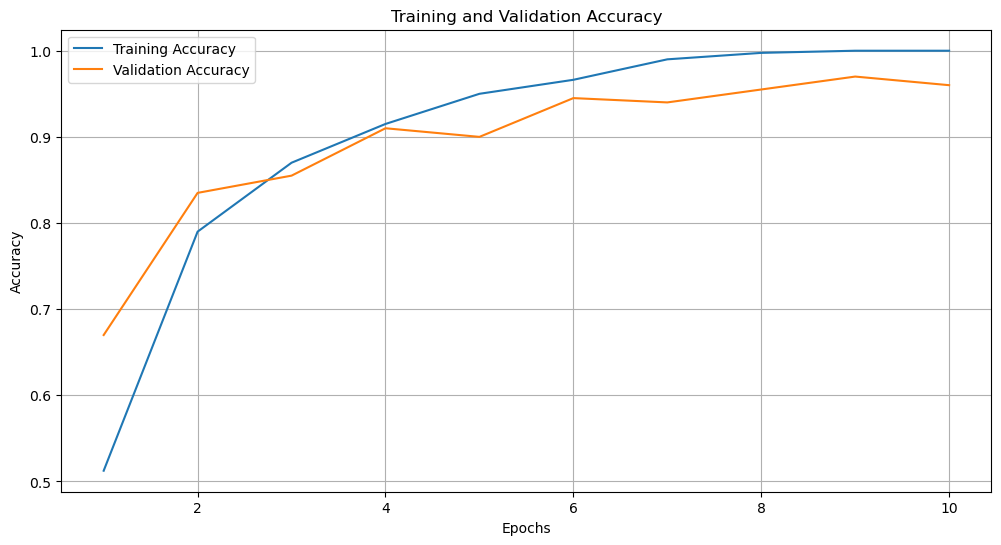

In [15]:
# Plot accuracy
plt.figure(figsize=(12, 6))
plt.plot(epochs_range, train_acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

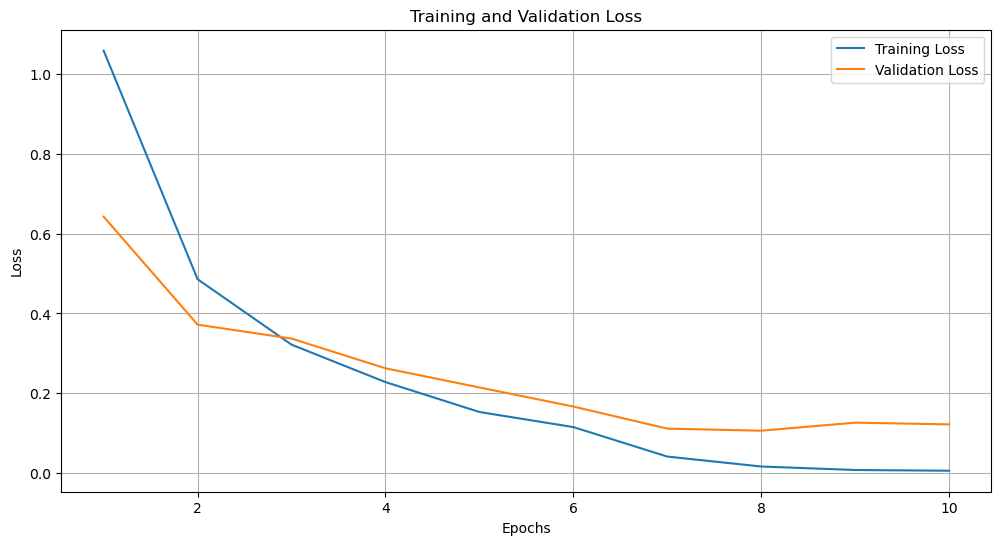

In [16]:
# Plot loss
plt.figure(figsize=(12, 6))
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

Let's proceed step by step to address **overfitting** using:  
1. **Regularization**  
2. **Reduce Model Complexity with Dropout**  
3. **Implement Early Stopping**

### **Step 1: Add Regularization and Dropout**

We’ll add L2 regularization to the convolutional and dense layers, and introduce dropout to randomly deactivate neurons, helping prevent overfitting.

In [17]:
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

In [67]:
model = Sequential([
    Input(shape=(150, 150, 3)),

    # First Convolutional Block with Regularization
    Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    MaxPooling2D((2, 2)),

    # Second Convolutional Block
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    MaxPooling2D((2, 2)),

    # Third Convolutional Block
    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    MaxPooling2D((2, 2)),

    # Flatten and Fully Connected Layers with Dropout
    Flatten(),
    Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.5),  # Drop 50% of neurons

    # Output Layer
    Dense(1, activation='sigmoid')
])

# Print model summary
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [68]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

### **Step 2: Add Early Stopping**  

We’ll stop training automatically if the validation loss does not improve for a set number of epochs.

In [72]:
# Initialize EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,          # Stop after 5 epochs with no improvement
    restore_best_weights=True  # Restore the best model weights
)

In [73]:
# Train the model with Early Stopping
history = model.fit(
    train_generator,
    epochs=50,  # Train for up to 20 epochs
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 249ms/step - accuracy: 0.9935 - loss: 0.1856 - val_accuracy: 0.9700 - val_loss: 0.2624
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 232ms/step - accuracy: 0.9930 - loss: 0.1755 - val_accuracy: 0.9650 - val_loss: 0.2202
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 229ms/step - accuracy: 0.9969 - loss: 0.1642 - val_accuracy: 0.9650 - val_loss: 0.2165
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 228ms/step - accuracy: 0.9991 - loss: 0.1619 - val_accuracy: 0.9850 - val_loss: 0.2047
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 227ms/step - accuracy: 0.9963 - loss: 0.1551 - val_accuracy: 0.9800 - val_loss: 0.1973
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 225ms/step - accuracy: 0.9988 - loss: 0.1576 - val_accuracy: 0.9800 - val_loss: 0.2008
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 228ms/step - accuracy: 0.9973 - loss: 0.1480 - val_accuracy: 0.9700 - val_loss: 0.1865
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 226ms/step - accuracy: 0.9973 - loss: 0.1430 - val_accuracy: 0.

1. **L2 Regularization:** Adds a penalty to large weights, discouraging overfitting.  
   - `kernel_regularizer=regularizers.l2(0.001)` penalizes large weights.  

2. **Dropout Layer:**  
   - `Dropout(0.5)` randomly deactivates 50% of neurons during training to improve generalization.  

3. **Early Stopping:**  
   - Monitors `val_loss` and stops training when it stops improving for 3 epochs.  
   - `restore_best_weights=True` ensures the model reverts to the best-performing epoch.

---

In [74]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(validation_generator)

print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
print(f"Validation Loss: {val_loss:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step - accuracy: 0.9918 - loss: 0.1694
Validation Accuracy: 99.00%
Validation Loss: 0.1648


In [75]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(train_acc) + 1)

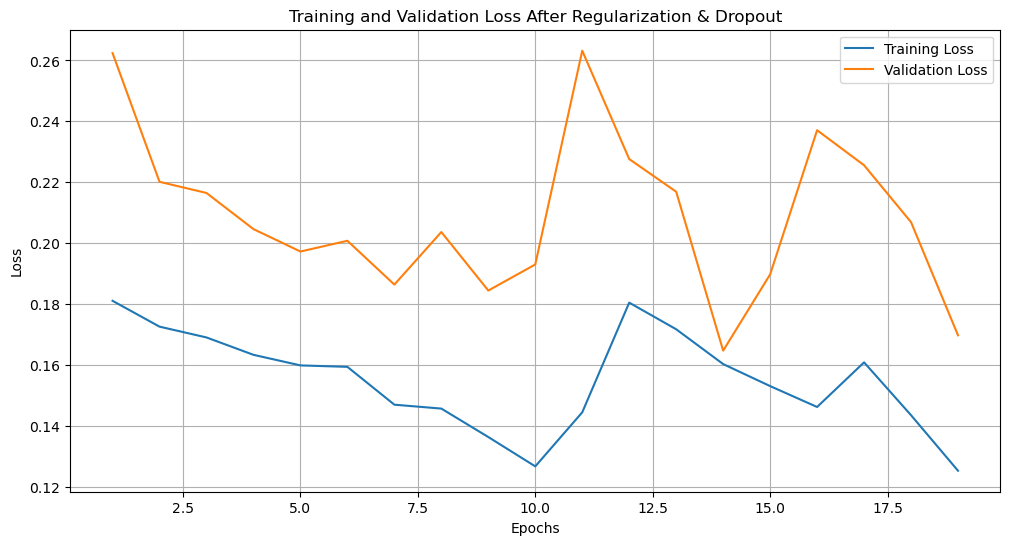

In [76]:
# Plot Loss
plt.figure(figsize=(12, 6))
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title("Training and Validation Loss After Regularization & Dropout")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

1. **Validation Loss Trend**:  
   - Compared to the earlier plot, the **validation loss** should now decrease more steadily.  
   - The gap between **training loss** and **validation loss** should have **reduced** slightly, indicating better generalization.  

2. **Effect of Dropout**:  
   - By dropping 50% of neurons randomly in the dense layer, the model learns to generalize instead of relying heavily on specific neurons. This reduces overfitting.  

3. **Effect of L2 Regularization**:  
   - L2 regularization penalized large weights, which helps prevent the model from becoming too complex and overfitting the training data.  

4. **Early Stopping**:  
   - Training stopped automatically when the validation loss stopped improving, preventing the model from overfitting due to excessive training.

---

### Testing

In [77]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, f1_score

In [78]:
# Get true labels and predictions
true_labels = validation_generator.classes
predictions = model.predict(validation_generator)
predicted_labels = np.round(predictions).flatten()

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 160ms/step


1. **`true_labels = validation_generator.classes`**  
   - `validation_generator.classes` retrieves the ground truth (actual labels) for the validation dataset.  
   - Each label corresponds to a class (e.g., `0` for "cat" and `1` for "dog").

2. **`predictions = model.predict(validation_generator)`**  
   - The `model.predict()` method generates predictions for the images in the validation dataset.  
   - The output `predictions` is an array of probabilities between **0 and 1**, where:  
     - Values closer to `0` indicate "cat."  
     - Values closer to `1` indicate "dog."

3. **`predicted_labels = np.round(predictions).flatten()`**  
   - `np.round(predictions)` rounds the probabilities:  
     - **Values < 0.5** → Rounded to `0` (Predicted as "cat").  
     - **Values >= 0.5** → Rounded to `1` (Predicted as "dog").  
   - `.flatten()` ensures the array is a 1D list for easy comparison.

---

### **Example Output**  

If the model predicts probabilities like this:  
```python
predictions = [0.1, 0.8, 0.3, 0.9]
```

- `np.round(predictions)` → `[0, 1, 0, 1]`  
- These labels correspond to **cats and dogs** as predicted by the model.  

In [79]:
accuracy = accuracy_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)

In [80]:
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"F1 Score: {f1:.4f}")

Accuracy: 99.00%
F1 Score: 0.9900


In [81]:
# Print detailed classification report
print("\nClassification Report:")
print(classification_report(true_labels, predicted_labels, target_names=['Cat', 'Dog']))


Classification Report:
              precision    recall  f1-score   support

         Cat       0.99      0.99      0.99       100
         Dog       0.99      0.99      0.99       100

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



In [82]:
# Generate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Cat', 'Dog'])

<Figure size 800x600 with 0 Axes>

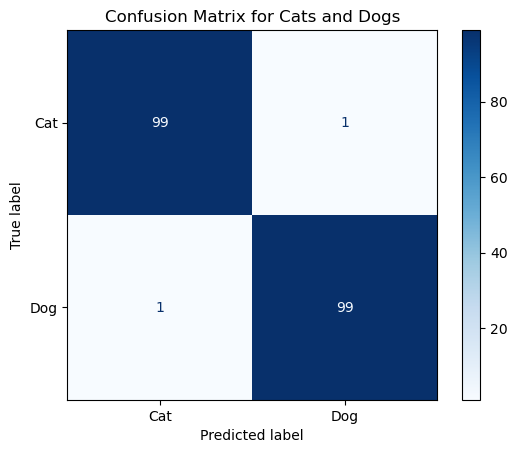

In [83]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix for Cats and Dogs")
plt.show();